In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as sig

In [24]:
def get_data(data_path):
    temp_force = []
    temp_time = []
    with open(data_path,"r") as f:
        for row in f:
            row = row.rstrip().split(",")
            temp_force.append(float(row[0]))
            temp_time.append(float(row[1]))
    
    temp_force = sig.medfilt(temp_force,5)
    temp_force = sig.medfilt(temp_force,5)
    temp_time = sig.medfilt(temp_time,5)
    temp_time = sig.medfilt(temp_time,5)

    return temp_force,temp_time

def gen_paths(blade):
    base = "".join(["data/",blade,"/"])
    paths = ["20percent.txt","40percent.txt","60percent.txt","80percent.txt"]
    paths = ["".join([base,i]) for i in paths]
    return paths


def normalize(data,n):
    avg = np.mean(data[0:n])
    ndata = [i-avg for i in data]
    return ndata


## 5x5V1S Blade

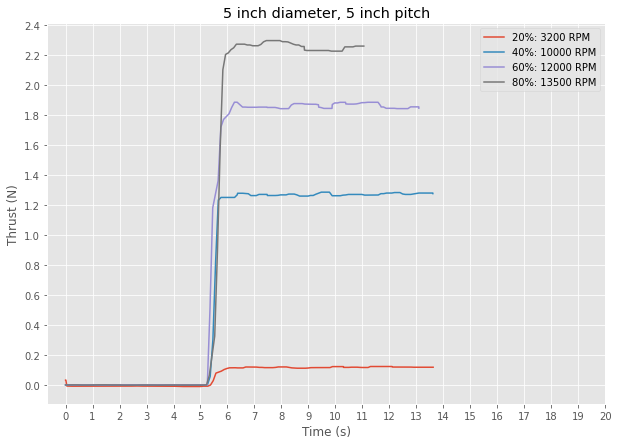

In [26]:
paths_5x5 = gen_paths("5x5V1S")

force = []
time = []
first = True
for i in paths_5x5:
    temp_force,temp_time = get_data(i)
    if first is True:
        first = False
        temp_force = temp_force[0:-75]
        temp_time = temp_time[0:-75]
    
    force.append(temp_force)
    time.append(temp_time)
    
force = [sig.medfilt(i,5) for i in force]
force = [normalize(np.array(i),10) for i in force]

plt.style.use('ggplot')
labs = ["20%: 3200 RPM","40%: 10000 RPM", "60%: 12000 RPM", "80%: 13500 RPM"]
fig, ax = plt.subplots(figsize=(10,7))
first = True
for i in range(len(force)):
    ax.plot(time[i],force[i],label=labs[i])
    ax.legend()
ax.set(title="5 inch diameter, 5 inch pitch",xlabel="Time (s)",ylabel="Thrust (N)")
plt.yticks(np.arange(0, 2.6, 0.2))
plt.xticks(np.arange(0, 21.0, 1))
plt.show()
fig.savefig("data/5x5V1S/plot.png")

## 8045 Blade

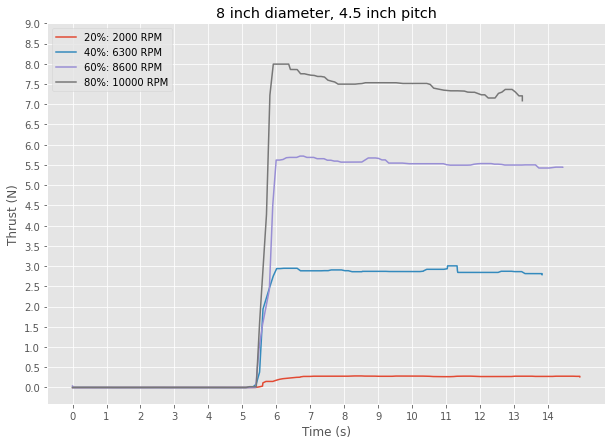

In [29]:
paths_8045 = gen_paths("8045")

force = []
time = []
for i in paths_8045:
    temp_force,temp_time = get_data(i)
    force.append(temp_force)
    time.append(temp_time)

force = [sig.medfilt(i,5) for i in force]
force = [normalize(np.array(i),10) for i in force]


plt.style.use('ggplot')
labs = ["20%: 2000 RPM","40%: 6300 RPM", "60%: 8600 RPM", "80%: 10000 RPM"]
fig, ax = plt.subplots(figsize=(10,7))
for i in range(len(force)):
    ax.plot(time[i],force[i],label=labs[i])
    ax.legend()


ax.set(title="8 inch diameter, 4.5 inch pitch",xlabel="Time (s)",ylabel="Thrust (N)")
plt.yticks(np.arange(0, 9.2, 0.5))
plt.xticks(np.arange(0, 15.0, 1))
plt.show()
fig.savefig("data/8045/plot.png")

## 5x3

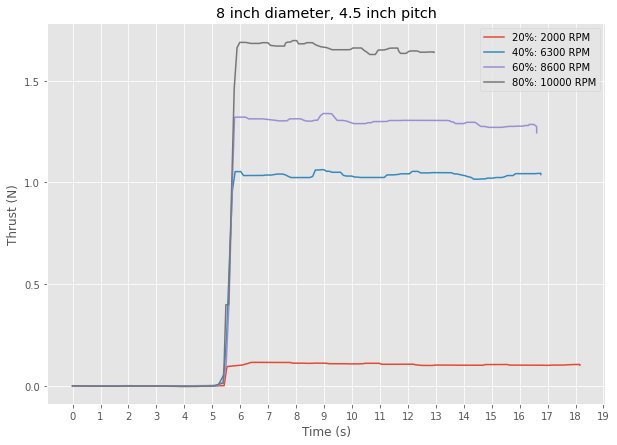

In [28]:
paths_5x3 = gen_paths("5x3")

force = []
time = []
for i in paths_5x3:
    temp_force,temp_time = get_data(i)
    force.append(temp_force)
    time.append(temp_time)

# median filter and normalize to average of first n data points
force = [sig.medfilt(i,5) for i in force]
force = [normalize(np.array(i),10) for i in force]


plt.style.use('ggplot')
labs = ["20%: 2000 RPM","40%: 6300 RPM", "60%: 8600 RPM", "80%: 10000 RPM"]
fig, ax = plt.subplots(figsize=(10,7))
for i in range(len(force)):
    ax.plot(time[i],force[i],label=labs[i])
    ax.legend()

ax.set(title="8 inch diameter, 4.5 inch pitch",xlabel="Time (s)",ylabel="Thrust (N)")
plt.yticks(np.arange(0, 2.0, 0.5))
plt.xticks(np.arange(0, 20.0, 1))
plt.show()

## Three blades together, 80% throttle

In [ ]:
 paths = []